# **House Prices Predication**
 * Model Selection 
 * Classification regressor 
 * Ensemble Learning

# **Importing**

In [1]:
import numpy as np 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score , mean_absolute_percentage_error
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor 
import lightgbm as ltb
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import accuracy_score,classification_report,precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import CategoricalNB, GaussianNB, ComplementNB, BernoulliNB, MultinomialNB 

# **Reading Data**

In [4]:
dataset_train = pd.read_csv('../../datasets/regression/train.csv')
dataset_test = pd.read_csv('../../datasets/regression/test.csv')
dataset_test_ids = dataset_test['Id']

# Snap of data
dataset_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dataset_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# **Pre-processing The Dataset**

In [6]:
# Checking Empty cells in Trainning data

pd.set_option('display.max_rows',None) # for showing all columns

dataset_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# Checking Empty cells in Testing data

pd.set_option('display.max_rows',None) # for showing all columns

dataset_test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
 # Handle Data issues 
    


 # Drop cols
dataset_train.drop(columns= ["Fence",'PoolQC','MiscFeature','Alley' ,'Id'] , axis = 1 , inplace=True )
dataset_test.drop(columns= ["Fence",'PoolQC','MiscFeature','Alley'  , 'Id'] , axis = 1 , inplace=True )

# Fill with mean
        
dataset_train["LotFrontage"].fillna(dataset_train["LotFrontage"].mean() ,inplace=True )
dataset_test["LotFrontage"].fillna(dataset_train["LotFrontage"].mean() ,inplace=True )


# Fill with Mode 
dataset_train["FireplaceQu"].fillna(dataset_train["FireplaceQu"].mode()[0] ,inplace=True )
dataset_test["FireplaceQu"].fillna(dataset_train["FireplaceQu"].mode()[0] ,inplace=True )


# drop small entries 

dataset_train.dropna(inplace=True )

# Filling Remaining Empty cells in testing dataset with mean per column 
for i in dataset_test.columns:
    if( dataset_test[i].isna().values.any()):
        dataset_test[i].fillna(dataset_test[i].mode()[0] , inplace=True  )




dataset_train.isna().sum()



MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [9]:
dataset_test.isna().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [10]:
dataset_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
dataset_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [12]:
# Labeling Categrocal Data 

# Getting Categrocal cols 
categorical_cols = dataset_train.select_dtypes(include=['object']).columns.tolist()


for nc in categorical_cols:
 dataset_train[nc]= LabelEncoder().fit_transform(dataset_train[nc],)
 dataset_test[nc]= LabelEncoder().fit_transform(dataset_test[nc],)



In [13]:
# Splitting Features from Output in Dataset
features_cols_tarin = dataset_train.drop(columns = ['SalePrice' ],axis=1)
output_cols_train =  dataset_train['SalePrice']


# Splitting Trainning data  for evalutaing 
features_train, features_test, output_train, output_test = train_test_split (features_cols_tarin, output_cols_train,
   test_size = 0.30,      random_state = 11,)



In [14]:
# Normalizing Data ranges 

normalizing_scaller =MinMaxScaler()  
normalizing_scaller.fit(features_train)
features_cols_train_normlized = normalizing_scaller.transform(features_train) 
features_cols_test_normlized = normalizing_scaller.transform(features_test) 

# normalize test data
features_cols_real_test = normalizing_scaller.transform(dataset_test  )



print(f"Normlized Features its max : \n{features_cols_train_normlized.max()} \n\nits min : \n{features_cols_train_normlized.min()}" )

#            x                  y
# train -> features_cols_train_normlized , output_train
# test -> features_cols_test_normlized , output_test


Normlized Features its max : 
1.0 

its min : 
0.0


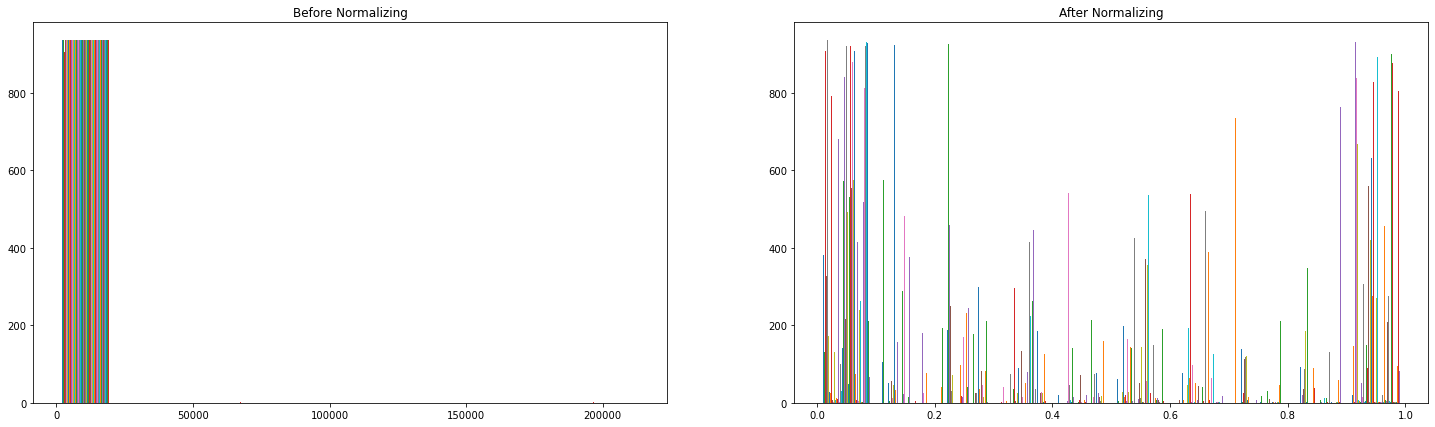

In [15]:
# Plotting Data Features before & after normalizing 

plt.figure(figsize=(25,7))

plt.subplot(1, 2,1  )
plt.hist(features_train) 
plt.title('Before Normalizing') 


plt.subplot(1, 2 , 2 )
plt.hist(features_cols_train_normlized) 
plt.title('After Normalizing') 

plt.show()



# **Model Selection**

Linear Regression

In [19]:
# Fitting Linear Regression to the dataset

# Train
regressor = LinearRegression() 
regressor.fit(features_cols_train_normlized, output_train)
# Predict
output_predicted = regressor.predict(features_cols_test_normlized)

# Metric
MAPE =	MAPE =	mean_absolute_percentage_error(output_test, output_predicted)
MSE = mean_squared_error(output_test, output_predicted)

print(f"MSE for Linear Regression : {MSE}")

MSE for Linear Regression : 1770488020.3550994


Polynomial Regression

In [21]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(features_cols_train_normlized)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, output_train)

# Predict
output_predicted2=pol_reg.predict(poly_reg.transform(features_cols_test_normlized))

MAPE_Poly=mean_absolute_percentage_error(output_test, output_predicted2)
MSE_Poly = mean_squared_error(output_test, output_predicted2)

print(f"MSE for Polynomial Regression : {MSE_Poly}")

MSE for Polynomial Regression : 1531257208.1819887


Classifcation Regressors 

In [25]:
# KNN 
regressor_knn = KNeighborsRegressor(n_neighbors=4) 
regressor_knn.fit(features_cols_train_normlized, output_train)
y_pred_knn = regressor_knn.predict(features_cols_test_normlized)
MAPE_knn	= mean_absolute_percentage_error(output_test, y_pred_knn)
MSE_knn	= mean_squared_error(output_test, y_pred_knn)
print(f'KNN Regressor with 16 Nieghbors , MSE: {MSE_knn}')

# SVR 
regressor_svr = SVR(kernel='rbf') 
regressor_svr.fit(features_cols_train_normlized, output_train)
y_pred_svr = regressor_svr.predict(features_cols_test_normlized)
MAPE_svr = mean_absolute_percentage_error(output_test, y_pred_svr)
MSE_svr	= mean_squared_error(output_test, y_pred_svr)
print(f'SVR Regressor For kernel rbf , MSE: {MSE_svr}')

# Decision Tree Regressor
regressor_DT = DecisionTreeRegressor() 
regressor_DT.fit(features_cols_train_normlized, output_train)
y_pred_DT = regressor_DT.predict(features_cols_test_normlized)
MAPE_dt	= mean_absolute_percentage_error(output_test, y_pred_DT)
MSE_dt	= mean_squared_error(output_test, y_pred_DT)
print(f'Decison Tree Regressor ,  MSE: {MSE_dt}')


KNN Regressor with 16 Nieghbors , MSE: 2484119658.6899877
SVR Regressor For kernel rbf , MSE: 7834615123.190678
Decison Tree Regressor ,  MSE: 2748599518.233831


Ensemble Learning Models

In [26]:
## Ensemble Learning
max_estimators= 200

# Random Forest Tree 
regressor_RF= 	RandomForestRegressor(n_estimators=max_estimators)
regressor_RF.fit(features_cols_train_normlized, output_train)

# Gradient Boosting  
regressor_GB = GradientBoostingRegressor(n_estimators=max_estimators) 
regressor_GB.fit(features_cols_train_normlized, output_train)


# XGB
regressor_XGB	= XGBRegressor(n_estimators=max_estimators) 
regressor_XGB.fit(features_cols_train_normlized, output_train)

# LGb 
regressor_LGBM =	ltb.LGBMRegressor(n_estimators=max_estimators) 
regressor_LGBM.fit(features_cols_train_normlized, output_train)

 
# There Metric
y_pred_rf = regressor_XGB.predict(features_cols_test_normlized)
MSE_rf=	mean_squared_error(output_test, y_pred_rf) 
print(f'\nFor Random Forest , MSE: {round(MSE_rf*100,2)}')

y_pred_gb = regressor_GB.predict(features_cols_test_normlized)
MSE_gb=	mean_squared_error(output_test, y_pred_gb) 
print(f'For Gradient Boosting , MSE: {round(MSE_gb*100,2)}')

y_pred_xgb = regressor_XGB.predict(features_cols_test_normlized)
MSE_xgb=	mean_squared_error(output_test, y_pred_xgb) 
print(f'For XGB , MSE: {round(MSE_xgb*100,2)}')

y_pred_lgb = regressor_LGBM.predict(features_cols_test_normlized)
MSE_lgb=	mean_squared_error(output_test, y_pred_lgb) 
print(f'For LGBM , MSE: {round(MSE_lgb*100,2)}')


For Random Forest , MSE: 168299809171.37
For Gradient Boosting , MSE: 124746253311.7
For XGB , MSE: 168299809171.37
For LGBM , MSE: 124633638144.41


In [28]:
# Stacking Trees 
estimators = [
     ('knn', KNeighborsRegressor(n_neighbors=5) ),
     ('svr',  SVR(kernel='rbf') )]
regressor_stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
regressor_stacking.fit(features_cols_train_normlized, output_train)

y_pred_stacking = regressor_stacking.predict(features_cols_test_normlized)
MSE_stacking=	mean_squared_error(output_test, y_pred_stacking) 
print(f'For Stacking Ensemble , MSE: {round(MSE_stacking*100,2)}')


For Stacking Ensemble , MSE: 238982990630.98


# **Predicting with Testing Data with Best Model**

As we've got our best model is Gradient Boosting Regressor

In [29]:
# Gradient Bossting Model 
predictions_gb = regressor_GB.predict (features_cols_real_test)


In [30]:
# Load the predicted data in csv file 

submission = pd.DataFrame({'Id':dataset_test_ids, 'SalePrice':predictions_gb})
# submission.to_csv('submission.csv', index=False)

In [31]:
submission.head()

,Id,SalePrice
0,1461,125435.291923
1,1462,160319.787785
2,1463,188344.326436
3,1464,190363.787529
4,1465,198013.691794
